#Mounting Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing Libraries

In [ ]:
# Importing Libraries...
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity

# Loading Data

In [ ]:
# Loading Data...
ratings = pd.read_csv('/content/drive/MyDrive/Semester-2/Recommendation System/Assignment_2/RAW_interactions.csv')
recipes = pd.read_csv('/content/drive/MyDrive/Semester-2/Recommendation System/Assignment_2/RAW_recipes.csv')

In [ ]:
ratings.head()

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


In [ ]:
recipes.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [ ]:
# Checking for duplicates
print(ratings.duplicated().sum())
print(recipes.duplicated().sum())

0
0


In [ ]:
print(ratings.shape)
print(recipes.shape)

(1132367, 5)
(231637, 12)


# Preprocessing

In [ ]:
# Replacing column name of recipes dataframe...
recipes.rename(columns={'id':'recipe_id'},inplace=True)
recipes.head()

,name,recipe_id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


## Merging Data

In [ ]:
# Merging the ratings and recipes dataframe on recipe_id
ratings_with_name = ratings.merge(recipes, on='recipe_id')
ratings_with_name.head()

,user_id,recipe_id,date,rating,review,name,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...,white bean green chile pepper soup,495,1533,2002-09-21,"['weeknight', 'time-to-make', 'course', 'main-...","[204.8, 5.0, 9.0, 26.0, 24.0, 2.0, 10.0]",4,"['combine beans , onion , chilies , 1 / 2 teas...",easy soup for the crockpot.,"['great northern beans', 'yellow onion', 'dice...",9
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall...",white bean green chile pepper soup,495,1533,2002-09-21,"['weeknight', 'time-to-make', 'course', 'main-...","[204.8, 5.0, 9.0, 26.0, 24.0, 2.0, 10.0]",4,"['combine beans , onion , chilies , 1 / 2 teas...",easy soup for the crockpot.,"['great northern beans', 'yellow onion', 'dice...",9
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...,devilicious cookie cake delights,20,56824,2002-10-27,"['30-minutes-or-less', 'time-to-make', 'course...","[132.3, 11.0, 39.0, 5.0, 4.0, 11.0, 5.0]",5,"['blend together cake mix , oil and eggs', 'ad...",NaN,"[""devil's food cake mix"", 'vegetable oil', 'eg...",4
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...,baked potato toppings,10,64342,2004-02-25,"['15-minutes-or-less', 'time-to-make', 'course...","[2786.2, 342.0, 134.0, 290.0, 161.0, 301.0, 42.0]",3,['pick whichever topping you want to use and c...,these toppings sure makes a nice change from p...,"['mayonnaise', 'salsa', 'cheddar cheese', 'ref...",13
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin...",baked potato toppings,10,64342,2004-02-25,"['15-minutes-or-less', 'time-to-make', 'course...","[2786.2, 342.0, 134.0, 290.0, 161.0, 301.0, 42.0]",3,['pick whichever topping you want to use and c...,these toppings sure makes a nice change from p...,"['mayonnaise', 'salsa', 'cheddar cheese', 'ref...",13


## Filtering based on users

In [ ]:
# Filtering merged dataframe based on the users...
X = ratings_with_name.groupby('user_id').count()['rating'] > 100
genuine_users = X[X].index
genuine_users

Int64Index([      1533,       1535,       2310,       2312,       3288,
                  4291,       4439,       4470,       4740,       5060,
            ...
               2206637,    2324285,    2399085,    2549237,    2597942,
            1800054678, 1802849661, 2000431901, 2000498330, 2001102678],
           dtype='int64', name='user_id', length=1368)

In [ ]:
# Filtered ratings...
filtered_ratings = ratings_with_name[ratings_with_name['user_id'].isin(genuine_users)]

## Filtering Based on Recipes

In [ ]:
# Filtering Based on recipes...
y = filtered_ratings.groupby('name').count()['rating']>=50
famous_recipes = y[y].index

In [ ]:
# Final ratings dataframe...
final_ratings = filtered_ratings[filtered_ratings['name'].isin(famous_recipes)]

In [ ]:
# Dropping Duplicates if any...
final_ratings.drop_duplicates()

,user_id,recipe_id,date,rating,review,name,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
4212,149363,96886,2005-05-11,5,This was awesome! Our whole family loved this ...,kittencal s spinach parmesan rice bake,40,89831,2004-08-04,"['60-minutes-or-less', 'time-to-make', 'course...","[351.2, 36.0, 3.0, 20.0, 35.0, 70.0, 5.0]",7,"['set oven to 350f', 'generously grease a 11 x...",this is a wonderful easy side dish to chicken ...,"['frozen chopped spinach', 'cooked white rice'...",13
4214,209441,96886,2005-06-06,5,"Awesome IS the word for this, I made this for ...",kittencal s spinach parmesan rice bake,40,89831,2004-08-04,"['60-minutes-or-less', 'time-to-make', 'course...","[351.2, 36.0, 3.0, 20.0, 35.0, 70.0, 5.0]",7,"['set oven to 350f', 'generously grease a 11 x...",this is a wonderful easy side dish to chicken ...,"['frozen chopped spinach', 'cooked white rice'...",13
4216,73836,96886,2005-09-07,5,This was scrumptious. I halved the recipe suc...,kittencal s spinach parmesan rice bake,40,89831,2004-08-04,"['60-minutes-or-less', 'time-to-make', 'course...","[351.2, 36.0, 3.0, 20.0, 35.0, 70.0, 5.0]",7,"['set oven to 350f', 'generously grease a 11 x...",this is a wonderful easy side dish to chicken ...,"['frozen chopped spinach', 'cooked white rice'...",13
4217,160974,96886,2005-09-11,5,I'm a spinach lover but the rest of the family...,kittencal s spinach parmesan rice bake,40,89831,2004-08-04,"['60-minutes-or-less', 'time-to-make', 'course...","[351.2, 36.0, 3.0, 20.0, 35.0, 70.0, 5.0]",7,"['set oven to 350f', 'generously grease a 11 x...",this is a wonderful easy side dish to chicken ...,"['frozen chopped spinach', 'cooked white rice'...",13
4218,195175,96886,2005-09-15,5,This makes a great side dish for company. It's...,kittencal s spinach parmesan rice bake,40,89831,2004-08-04,"['60-minutes-or-less', 'time-to-make', 'course...","[351.2, 36.0, 3.0, 20.0, 35.0, 70.0, 5.0]",7,"['set oven to 350f', 'generously grease a 11 x...",this is a wonderful easy side dish to chicken ...,"['frozen chopped spinach', 'cooked white rice'...",13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1123827,130531,131018,2014-12-14,5,I have been making this recipe for a couple of...,pulled pork crock pot,1110,50509,2005-07-25,"['time-to-make', 'course', 'main-ingredient', ...","[335.1, 10.0, 72.0, 24.0, 80.0, 10.0, 8.0]",26,"['slice one onion and place in crock pot', 'pu...","i found this pulled pork recipe years ago, and...","['pork roast', 'onions', 'ginger ale', 'barbec...",4
1123829,121690,131018,2015-01-08,5,I&#039;ve made this twice without substitution...,pulled pork crock pot,1110,50509,2005-07-25,"['time-to-make', 'course', 'main-ingredient', ...","[335.1, 10.0, 72.0, 24.0, 80.0, 10.0, 8.0]",26,"['slice one onion and place in crock pot', 'pu...","i found this pulled pork recipe years ago, and...","['pork roast', 'onions', 'ginger ale', 'barbec...",4
1123855,51931,131018,2015-11-29,5,I am reviewing the recipe two ways. One as wr...,pulled pork crock pot,1110,50509,2005-07-25,"['time-to-make', 'course', 'main-ingredient', ...","[335.1, 10.0, 72.0, 24.0, 80.0, 10.0, 8.0]",26,"['slice one onion and place in crock pot', 'pu...","i found this pulled pork recipe years ago, and...","['pork roast', 'onions', 'ginger ale', 'barbec...",4
1123860,59686,131018,2016-03-18,5,"Since we butcher our own meat, I used a 4-1/2 ...",pulled pork crock pot,1110,50509,2005-07-25,"['time-to-make', 'course', 'main-ingredient', ...","[335.1, 10.0, 72.0, 24.0, 80.0, 10.0, 8.0]",26,"['slice one onion and place in crock pot', 'pu...","i found this pulled pork recipe years ago, and...","['pork roast', 'onions', 'ginger ale', 'barbec...",4


# Train-Test Split

In [ ]:
# Train-Test Split...
train_data, test_data = train_test_split(final_ratings, test_size=0.2)

In [ ]:
test_data

,user_id,recipe_id,date,rating,review,name,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
642812,195175,16371,2007-01-02,5,These were great and easy to make.I followed t...,streamlined chimichangas,20,22015,2001-12-29,"['30-minutes-or-less', 'time-to-make', 'course...","[373.7, 34.0, 10.0, 31.0, 36.0, 50.0, 8.0]",11,"['preheat oven to 475 degrees', 'brown meat wi...",this is a great tasting recipe and so easy tha...,"['ground beef', 'onion', 'garlic clove', 'pace...",9
18441,85873,150384,2006-01-18,5,A restaurant quality recipe worth more then 5*...,panera broccoli cheese soup,70,192957,2006-01-04,"['time-to-make', 'course', 'main-ingredient', ...","[702.6, 81.0, 46.0, 33.0, 55.0, 162.0, 10.0]",14,"['saut onion in butter', 'set aside', 'cook me...",a very good broccoli cheese soup. served with ...,"['butter', 'onion', 'flour', 'half-and-half cr...",12
982442,64203,63786,2007-03-04,5,These are better than any restaurant fajitas I...,steak or chicken fajitas,20,82367,2003-06-05,"['30-minutes-or-less', 'time-to-make', 'course...","[137.2, 8.0, 8.0, 14.0, 5.0, 5.0, 6.0]",12,"['slice steak into thin strips', 'in bowl , mi...",these are so quick and tasty. you can use stri...,"['top sirloin steak', 'olive oil', 'lime juice...",16
495298,542159,117194,2009-12-24,5,"The perfect quick, healthy snack. So easy and ...",apple bites,5,193516,2005-04-14,"['15-minutes-or-less', 'time-to-make', 'course...","[97.9, 0.0, 75.0, 0.0, 1.0, 0.0, 8.0]",4,"['cut up apple into bite sized chunks', 'put t...","a delicious, incredibly easy way to dress up f...","['apple', 'cinnamon']",2
436810,64203,95086,2007-01-29,5,Andypandy - \nThank you so much for sharing th...,rustic italian bread abm,215,106624,2004-07-05,"['time-to-make', 'course', 'cuisine', 'prepara...","[84.0, 2.0, 1.0, 3.0, 4.0, 1.0, 4.0]",15,"['add flour , oil , salt , sugar , yeast and w...",this is the one i make all the time. i use th...,"['warm water', 'olive oil', 'bread flour', 'gr...",8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9902,122877,26110,2009-10-26,5,"Rushed making them, used 1/2 whole wheat 1/2 w...",southern buttermilk biscuits,22,38532,2002-04-22,"['30-minutes-or-less', 'time-to-make', 'course...","[162.6, 11.0, 5.0, 16.0, 6.0, 22.0, 6.0]",21,"['preheat your oven to 450f', 'combine the dry...",these buttermilk biscuits are authentic. this ...,"['unbleached all-purpose flour', 'baking soda'...",6
1049339,132383,135350,2010-01-13,5,The best mac and cheese we have had yet. My h...,fannie farmer s classic baked macaroni cheese,40,148316,2005-08-29,"['60-minutes-or-less', 'time-to-make', 'course...","[836.2, 80.0, 11.0, 37.0, 55.0, 162.0, 21.0]",17,"['preheat oven to 400f', 'cook and drain macar...","to me fannie farmer's recipe is the only ""real...","['macaroni', 'butter', 'flour', 'milk', 'cream...",9
634543,105601,87925,2008-08-03,5,"This was so, so fabulous!! I love frosted bro...",kittencal s extreme chocolate brownies,50,89831,2004-03-31,"['60-minutes-or-less', 'time-to-make', 'course...","[179.6, 14.0, 74.0, 3.0, 4.0, 28.0, 8.0]",13,"['set oven to 325 degrees f', 'grease a 13 x 9...",if your looking for an everyday run-of-the-mil...,"['butter', 'sugar', 'water', 'semi-sweet choco...",9
936565,207176,82102,2008-03-30,5,This was a winner with the family and it was s...,kittencal s moist cheddar garlic oven fried ch...,60,89831,2004-01-26,"['60-minutes-or-less', 'time-to-make', 'course...","[452.1, 40.0, 6.0, 35.0, 69.0, 73.0, 6.0]",8,"['preheat oven to 350f', 'butter an 11 x 7-inc...",this is for serious garlic lovers. the chicken...,"['butter', 'garlic', 'garlic powder', 'seasoni...",10


# Creating Pivot Table

In [ ]:
# create pivot table for train data
train_pt = train_data.pivot_table(index='name', columns='user_id', values='rating')
# calculate similarity scores
similarity_scores = cosine_similarity(train_pt.fillna(0))
# create pivot table for test data
test_pt = test_data.pivot_table(index='name', columns='user_id', values='rating')
# test_pt.fillna(0,inplace=True)
# train_pt.fillna(0,inplace=True)

In [ ]:
test_pt

user_id,1533,1535,2312,3288,4291,4439,4470,4740,5060,6258,...,1706426,1900301,2123645,2206637,2324285,2549237,1800054678,2000431901,2000498330,2001102678
name,,,,,,,,,,,,,,,,,,,,,
24k carrots,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4 minute spicy garlic shrimp,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40 minute hamburger buns,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
absolute best ever lasagna,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
all purpose stir fry sauce brown garlic sauce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ww 0 point weight watchers cabbage soup,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
yes virginia there is a great meatloaf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
yummy crispy baked fish,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
test_pt.columns

Int64Index([      1533,       1535,       2312,       3288,       4291,
                  4439,       4470,       4740,       5060,       6258,
            ...
               1706426,    1900301,    2123645,    2206637,    2324285,
               2549237, 1800054678, 2000431901, 2000498330, 2001102678],
           dtype='int64', name='user_id', length=1167)

# Recommendation Engine

In [ ]:
# loop over each user in the test set
def get_top_k_recommendations(user_id,k):
    if user_id not in train_pt.columns:
        return []
    # get the recipes that the user has not rated
    rated_recipes = train_pt[user_id]
    # rated_recipes = rated_recipes[rated_recipes != 0]
    rated_recipes = rated_recipes[rated_recipes.notna()]  
    unrated_recipes = train_pt.index.difference(rated_recipes.index)
    predicted_ratings = []
    # loop over each unrated recipe
    for recipe_name in unrated_recipes:
        # calculate predicted rating using similarity scores and user ratings
        similarity_scores_for_recipe = similarity_scores[train_pt.index.get_loc(recipe_name)]
        user_ratings = train_pt[user_id].fillna(0)
        numerator = (user_ratings * similarity_scores_for_recipe).sum()
        denominator = similarity_scores_for_recipe.sum()
        if denominator == 0:
            predicted_rating = 0
        else:
            predicted_rating = numerator / denominator
        
        predicted_ratings.append((recipe_name, predicted_rating))

    # predicted_ratings = sorted(predicted_ratings, key=lambda x: x[1], reverse=True)
    # top_k_recommendations = [r[0] for r in predicted_ratings][:k]
    top_recipe_names = [recipe_name for recipe_name, predicted_rating in sorted(predicted_ratings, key=lambda x: x[1], reverse=True)[:k]]
    return top_recipe_names
    # return top_k_recommendations

In [ ]:
top_recipes = get_top_k_recommendations(47559,10)
top_recipes

['easy peezy pizza dough  bread machine pizza dough',
 'chicken legs grilled',
 'pan release  professional pan coating  better than pam spray',
 'halloween party treat  candy corn and peanut mix',
 'breakfast in a mug',
 'grilled cheese  diner style',
 'bacon wrapped jalapeno poppers',
 'best banana bread',
 'self rising flour',
 'buttered egg noodles  best ever']

# Evaluating Recommendations

In [ ]:
def evaluate_recommendations(user_id, k):
    # get the actual rated recipes for the user
    actual_rated_recipes = test_pt[user_id]
    actual_rated_recipes = actual_rated_recipes[actual_rated_recipes.notna()]
    actual_rated_recipes_set = set(actual_rated_recipes.index)
    
    # get the top-k recommended recipes for the user
    top_k_recommendations = get_top_k_recommendations(user_id, k)
    top_k_recommendations_set = set(top_k_recommendations)
    
    # calculate precision and recall
    intersection = actual_rated_recipes_set.intersection(top_k_recommendations_set)
    if len(top_k_recommendations_set) == 0:
      precision = 0.0
    else:
      precision = len(intersection) / len(top_k_recommendations_set)
    recall = len(intersection) / len(actual_rated_recipes_set)
    
    return precision, recall

In [ ]:
# Precision for single user...
P,R = evaluate_recommendations(23333,10)
print("Precision: ",P)
print("Recall: ",R)

Precision:  0.0
Recall:  0.0


In [ ]:
k_values = [5, 10, 50, 60,70,80,90, 100]
precision_scores = []
recall_scores = []

for k in k_values:
    total_precision = 0
    total_recall = 0
    num_users = 0

    for user_id in test_pt.columns:
        if not test_pt[user_id].isnull().all():
            precision, recall = evaluate_recommendations(user_id, k)
            total_precision += precision
            total_recall += recall
            num_users += 1

    precision_scores.append(total_precision / num_users)
    recall_scores.append(total_recall / num_users)

print("Precision scores:", precision_scores)
print("Recall scores:", recall_scores)


Precision scores: [0.9917737789203084, 0.991859468723222, 0.9918423307626396, 0.9918737503570411, 0.9919329171257188, 0.9919237360754065, 0.991935637436923, 0.9919622964867184]
Recall scores: [0.015948492526337416, 0.03189974923986558, 0.15949596412095807, 0.19140124173520176, 0.2233148119110286, 0.2552145611508899, 0.28711983876513736, 0.31901135765986255]


# Visualizing Precision and Recall for Different K

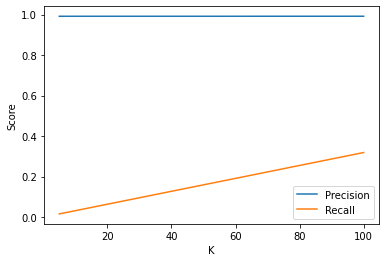

In [ ]:
import matplotlib.pyplot as plt

plt.plot(k_values, precision_scores, label='Precision')
plt.plot(k_values, recall_scores, label='Recall')
plt.xlabel('K')
plt.ylabel('Score')
plt.legend()
plt.show()